In [0]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [0]:
tratamento = pd.read_csv('anova.csv', sep=';')
#Importando base de dados

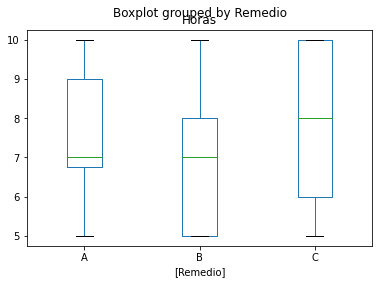

In [3]:
tratamento.boxplot(by= 'Remedio', grid=False)
#Greando grafico boxplot

In [16]:
modelo1= ols('Horas ~ Remedio', data= tratamento).fit()
resultado1= sm.stats.anova_lm(modelo1)
print(resultado1)
#Gerando o primeiro modelo de comparação com duas variaveis

            df     sum_sq   mean_sq         F    PR(>F)
Remedio    2.0   4.083333  2.041667  0.537618  0.591966
Residual  21.0  79.750000  3.797619       NaN       NaN


In [19]:
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()
resultado2 = sm.stats.anova_lm(modelo2)
print(resultado2)
#Greando o modelo com 3 variaveis

                df     sum_sq   mean_sq         F    PR(>F)
Remedio        2.0   4.083333  2.041667  0.532609  0.596042
Sexo           1.0   4.166667  4.166667  1.086957  0.310948
Remedio:Sexo   2.0   6.583333  3.291667  0.858696  0.440360
Residual      18.0  69.000000  3.833333       NaN       NaN


In [24]:
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)
#Fazendo o teste de tukey

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


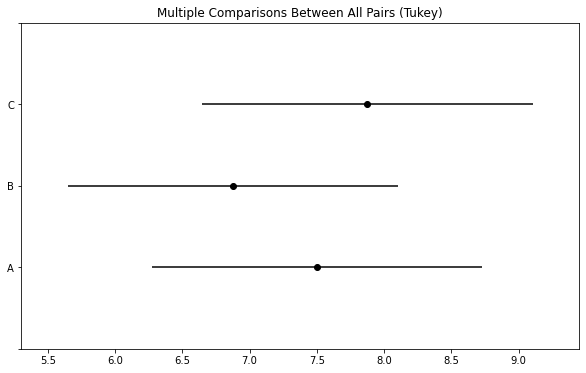

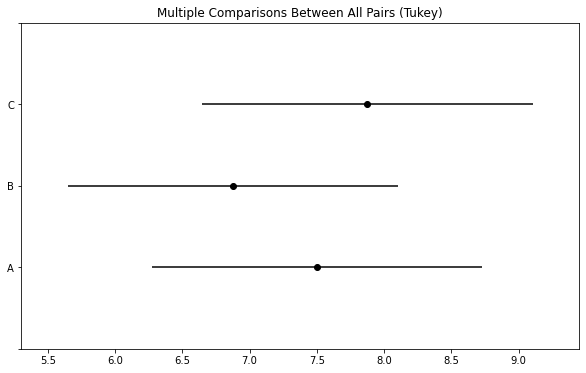

In [25]:
resultado_teste.plot_simultaneous()
#Gerando o grafico do resultado de tukey